# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
!pip install alpaca_trade_api

In [3]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [4]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [5]:
# The monthly amount for the member's household income
monthly_income = 12000


#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [6]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [7]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(btc_response, indent=4, sort_keys=True))


{
    "data": {
        "1": {
            "circulating_supply": 19021243,
            "id": 1,
            "last_updated": 1650839299,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 757142950976,
                    "percent_change_1h": 0.300642961504206,
                    "percent_change_24h": -0.461738971696848,
                    "percent_change_7d": -1.74643753920164,
                    "percentage_change_1h": 0.300642961504206,
                    "percentage_change_24h": -0.461738971696848,
                    "percentage_change_7d": -1.74643753920164,
                    "price": 39744.0,
                    "volume_24h": 16726534575
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 19021243,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurre

In [8]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response, indent=3, sort_keys=True))


{
   "data": {
      "1027": {
         "circulating_supply": 120514250,
         "id": 1027,
         "last_updated": 1650839286,
         "max_supply": 0,
         "name": "Ethereum",
         "quotes": {
            "USD": {
               "market_cap": 355765808501,
               "percent_change_1h": -0.0370248090639397,
               "percent_change_24h": -0.724523582248288,
               "percent_change_7d": -3.92894842644351,
               "percentage_change_1h": -0.0370248090639397,
               "percentage_change_24h": -0.724523582248288,
               "percentage_change_7d": -3.92894842644351,
               "price": 2945.88,
               "volume_24h": 9094269101
            }
         },
         "rank": 2,
         "symbol": "ETH",
         "total_supply": 120514250,
         "website_slug": "ethereum"
      }
   },
   "metadata": {
      "error": null,
      "num_cryptocurrencies": 3106,
      "timestamp": 1650839286
   }
}


#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [9]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response['data']['1']['quotes']['USD']['price']


# Print the current price of BTC
print(f"The price for Bitcoin is ${btc_price}")


The price for Bitcoin is $39744.0


In [10]:
# Navigate the BTC response object to access the current price of ETH
eth_price =  eth_response['data']['1027']['quotes']['USD']['price']

# Print the current price of ETH
print(f"The price for Ethereum is ${eth_price}")



The price for Ethereum is $2945.88


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [11]:
# Compute the current value of the BTC holding 
btc_value = btc_price * btc_coins

# Print current value of your holding in BTC
print(btc_value)


47692.799999999996


In [12]:
# Compute the current value of the ETH holding 
eth_value = eth_price * eth_coins

# Print current value of your holding in ETH
print(eth_value)


15613.164


In [13]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value 

# Print current cryptocurrency wallet balance
print(total_crypto_wallet)


63305.96399999999


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [14]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [15]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")


#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [16]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ["SPY", "AGG"]

# Set timeframe to 1Day
timeframe = "1Day"

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
start_date = pd.Timestamp("2022-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-03-05", tz="America/New_York").isoformat()


#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [17]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
# Separate ticker data
SPY = prices_df[prices_df['symbol']=='SPY'].drop('symbol', axis=1)
AGG = prices_df[prices_df['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
prices_df =  pd.concat([SPY,AGG],axis=1, keys=['SPY','AGG'])

# Review the first 5 rows of the Alpaca DataFrame
prices_df.head()


SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2022-01-03 05:00:00+00:00  476.45  477.85  473.85  477.71   72859933   
2022-01-04 05:00:00+00:00  479.26  479.98  475.58  477.55   72130318   
2022-01-05 05:00:00+00:00  477.25  477.98  468.29  468.38  102090390   
2022-01-06 05:00:00+00:00  468.00  470.82  465.43  467.94   86899217   
2022-01-07 05:00:00+00:00  468.00  469.20  464.65  466.09   84914433   

                                                      AGG                     \
                          trade_count        vwap    open      high      low   
timestamp                                                                      
2022-01-03 05:00:00+00:00      534806  476.520945  113.67  113.6753  113.300   
2022-01-04 05:00:00+00:00      565261  477.865001  113.22  113.3000  113.075   
2022-01-05 05:00:00+00:00      784963  473.338870  113.34  113.3600  112.900   
2022-01-06 05:00:00+00:00      803299  468.482337  112.75  112.8400  112.660   
2022-01-07 05:00:00+00:00      623751  466.942032  112.69  112.7050  112.340   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2022-01-03 05:00:00+00:00  113.30  9398873       30228  113.467418  
2022-01-04 05:00:00+00:00  113.29  7769088       31298  113.183583  
2022-01-05 05:00:00+00:00  112.94  8025339       26819  113.102165  
2022-01-06 05:00:00+00:00  112.82  8859820       24721  112.771554  
2022-01-07 05:00:00+00:00  112.49  9018694       32424  112.502900

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [18]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = prices_df["AGG"]["close"][0]

# Print the AGG closing price
agg_close_price


113.3

In [19]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = prices_df["SPY"]["close"][0]

# Print the SPY closing price
spy_close_price


477.71

#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [20]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_shares * agg_close_price

# Print the current value of the bond portfolio
print(agg_value)


22660.0


In [21]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_shares * spy_close_price

# Print the current value of the stock portfolio
print(spy_value)


52548.1


In [22]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value * spy_value

# Print the current balance of the stock and bond portion of the portfolio
print(total_stocks_bonds)

1190739946.0


In [23]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency wallet to the value of the total stocks and bonds
total_portfolio = total_crypto_wallet + total_stocks_bonds

# Print current cryptocurrency wallet balance
print(total_portfolio)


1190803251.964


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [24]:
# Consolidate financial assets data into a Python list
savings_data = [
    total_crypto_wallet,
    total_stocks_bonds
]
# Review the Python list savings_data
savings_data
    

[63305.96399999999, 1190739946.0]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [25]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame(savings_data, columns = ['amount'], index = ['cryto', 'stocks/bonds'])


# Display the savings_df DataFrame
savings_df


,amount
cryto,6.330596e+04
stocks/bonds,1.190740e+09


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':'Savings Composition'}, ylabel='amount'>

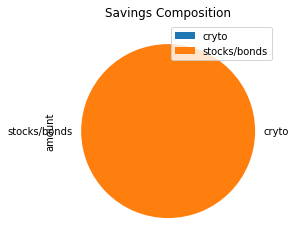

In [26]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot(kind = 'pie', y='amount', title = 'Savings Composition')


#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [27]:
# Create a variable named emergency_fund_value
emergency_fund_value = monthly_income * 3


##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [28]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
if total_portfolio > emergency_fund_value:
    print('Congrats! You have more than enough money in your account.')
elif total_portfolio == emergency_fund_value:
    print('Great job. You have reached this important financial goal')
else:
    print(f'You are $(emergency_fund_value - total_portfolio) from reaching your financial goal.')


Congrats! You have more than enough money in your account.


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [29]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
start_date = pd.Timestamp("2019-01-24", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2019-04-24", tz="America/New_York").isoformat()


# Set number of rows to 1000 to retrieve the maximum amount of rows
limit_rows = 1000

In [30]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
# Separate ticker data
SPY = prices_df[prices_df['symbol']=='SPY'].drop('symbol', axis=1)
AGG = prices_df[prices_df['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
prices_df = pd.concat([SPY,AGG],axis=1, keys=['SPY','AGG'])

# Display both the first and last five rows of the DataFrame
display(prices_df.head())
display(prices_df.tail())


SPY                                      \
                             open    high       low   close    volume   
timestamp                                                               
2019-01-24 05:00:00+00:00  263.21  264.20  262.0800  263.55  59210139   
2019-01-25 05:00:00+00:00  265.62  266.70  263.6595  265.78  97543258   
2019-01-28 05:00:00+00:00  263.38  263.83  261.7900  263.76  85973985   
2019-01-29 05:00:00+00:00  263.93  264.55  262.4800  263.41  66960738   
2019-01-30 05:00:00+00:00  265.09  268.52  264.2500  267.58  92630929   

                                                      AGG                    \
                          trade_count        vwap    open     high      low   
timestamp                                                                     
2019-01-24 05:00:00+00:00      315573  263.254660  106.71  106.840  106.670   
2019-01-25 05:00:00+00:00      409476  265.863241  106.64  106.700  106.560   
2019-01-28 05:00:00+00:00      408381  263.363031  106.62  106.745  106.580   
2019-01-29 05:00:00+00:00      287015  263.501239  106.73  106.925  106.685   
2019-01-30 05:00:00+00:00      469964  266.578426  106.87  107.150  106.790   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2019-01-24 05:00:00+00:00  106.73  7311478       14637  106.742650  
2019-01-25 05:00:00+00:00  106.68  3469453       15543  106.638484  
2019-01-28 05:00:00+00:00  106.62  7365812       17765  106.636129  
2019-01-29 05:00:00+00:00  106.90  6158842       17524  106.833638  
2019-01-30 05:00:00+00:00  107.14  6350546       18798  107.010126

SPY                                     \
                             open     high     low   close    volume   
timestamp                                                              
2019-04-17 04:00:00+00:00  291.41  291.425  288.99  289.45  58268470   
2019-04-18 04:00:00+00:00  290.12  290.320  288.66  290.02  69414428   
2019-04-22 04:00:00+00:00  289.17  290.435  289.07  290.27  40520264   
2019-04-23 04:00:00+00:00  290.68  293.140  290.42  292.88  52411775   
2019-04-24 04:00:00+00:00  292.76  293.160  292.07  292.23  50469550   

                                                      AGG                    \
                          trade_count        vwap    open      high     low   
timestamp                                                                     
2019-04-17 04:00:00+00:00      245037  289.770682  108.09  108.1899  108.05   
2019-04-18 04:00:00+00:00      231296  289.794161  108.23  108.2900  108.16   
2019-04-22 04:00:00+00:00      170767  290.002934  108.13  108.1600  108.05   
2019-04-23 04:00:00+00:00      232023  292.102165  108.18  108.2800  108.15   
2019-04-24 04:00:00+00:00      203858  292.580824  108.42  108.5300  108.42   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2019-04-17 04:00:00+00:00  108.05  3390171        9569  108.090758  
2019-04-18 04:00:00+00:00  108.19  2217221        8388  108.211849  
2019-04-22 04:00:00+00:00  108.06  5725616        9161  108.098893  
2019-04-23 04:00:00+00:00  108.25  3422712       10779  108.236718  
2019-04-24 04:00:00+00:00  108.50  3000163       10192  108.496809

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [31]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
mc_thirty_year = MCSimulation(
    prices_df,
    weights= [.4 , .6],
    num_simulation= 100,
    num_trading_days= 252 * 30
)

# Review the simulation input data
mc_thirty_year.portfolio_data


SPY                                       \
                             open     high       low   close    volume   
timestamp                                                                
2019-01-24 05:00:00+00:00  263.21  264.200  262.0800  263.55  59210139   
2019-01-25 05:00:00+00:00  265.62  266.700  263.6595  265.78  97543258   
2019-01-28 05:00:00+00:00  263.38  263.830  261.7900  263.76  85973985   
2019-01-29 05:00:00+00:00  263.93  264.550  262.4800  263.41  66960738   
2019-01-30 05:00:00+00:00  265.09  268.520  264.2500  267.58  92630929   
...                           ...      ...       ...     ...       ...   
2019-04-17 04:00:00+00:00  291.41  291.425  288.9900  289.45  58268470   
2019-04-18 04:00:00+00:00  290.12  290.320  288.6600  290.02  69414428   
2019-04-22 04:00:00+00:00  289.17  290.435  289.0700  290.27  40520264   
2019-04-23 04:00:00+00:00  290.68  293.140  290.4200  292.88  52411775   
2019-04-24 04:00:00+00:00  292.76  293.160  292.0700  292.23  50469550   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-01-24 05:00:00+00:00      315573  263.254660          NaN  106.71   
2019-01-25 05:00:00+00:00      409476  265.863241     0.008461  106.64   
2019-01-28 05:00:00+00:00      408381  263.363031    -0.007600  106.62   
2019-01-29 05:00:00+00:00      287015  263.501239    -0.001327  106.73   
2019-01-30 05:00:00+00:00      469964  266.578426     0.015831  106.87   
...                               ...         ...          ...     ...   
2019-04-17 04:00:00+00:00      245037  289.770682    -0.002447  108.09   
2019-04-18 04:00:00+00:00      231296  289.794161     0.001969  108.23   
2019-04-22 04:00:00+00:00      170767  290.002934     0.000862  108.13   
2019-04-23 04:00:00+00:00      232023  292.102165     0.008992  108.18   
2019-04-24 04:00:00+00:00      203858  292.580824    -0.002219  108.42   

                                                                           \
                               high      low   close   volume trade_count   
timestamp                                                                   
2019-01-24 05:00:00+00:00  106.8400  106.670  106.73  7311478       14637   
2019-01-25 05:00:00+00:00  106.7000  106.560  106.68  3469453       15543   
2019-01-28 05:00:00+00:00  106.7450  106.580  106.62  7365812       17765   
2019-01-29 05:00:00+00:00  106.9250  106.685  106.90  6158842       17524   
2019-01-30 05:00:00+00:00  107.1500  106.790  107.14  6350546       18798   
...                             ...      ...     ...      ...         ...   
2019-04-17 04:00:00+00:00  108.1899  108.050  108.05  3390171        9569   
2019-04-18 04:00:00+00:00  108.2900  108.160  108.19  2217221        8388   
2019-04-22 04:00:00+00:00  108.1600  108.050  108.06  5725616        9161   
2019-04-23 04:00:00+00:00  108.2800  108.150  108.25  3422712       10779   
2019-04-24 04:00:00+00:00  108.5300  108.420  108.50  3000163       10192   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-01-24 05:00:00+00:00  106.742650          NaN  
2019-01-25 05:00:00+00:00  106.638484    -0.000468  
2019-01-28 05:00:00+00:00  106.636129    -0.000562  
2019-01-29 05:00:00+00:00  106.833638     0.002626  
2019-01-30 05:00:00+00:00  107.010126     0.002245  
...                               ...          ...  
2019-04-17 04:00:00+00:00  108.090758    -0.000093  
2019-04-18 04:00:00+00:00  108.211849     0.001296  
2019-04-22 04:00:00+00:00  108.098893    -0.001202  
2019-04-23 04:00:00+00:00  108.236718     0.001758  
2019-04-24 04:00:00+00:00  108.496809     0.002309  

[63 rows x 16 columns]

In [32]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
mc_thirty_year.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998544,1.002271,0.998024,1.003234,1.002817,0.998435,1.003118,0.999681,0.999488,1.000525,...,1.000681,1.002214,1.005285,1.003073,0.994495,0.999610,1.005154,1.000790,0.997289,1.002843
2,1.000615,1.002412,0.997685,0.999169,1.003275,0.996349,1.005266,0.999860,1.001767,0.997348,...,0.999438,0.998571,1.000709,1.003928,0.994169,1.000033,1.002102,1.002658,0.999796,1.002048
3,1.001026,1.002305,1.003061,0.999532,1.005356,0.999093,1.005632,1.002819,1.002813,0.999308,...,1.000498,0.995237,1.004269,1.004496,1.001369,1.001268,1.000212,1.003557,1.000495,1.002810
4,1.004553,1.002168,1.008183,0.998509,1.006318,0.997693,1.006620,1.008171,1.002952,0.998566,...,1.001316,0.997111,1.005224,1.007888,1.002940,1.002247,1.002551,1.004595,0.998599,1.005136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,508.282999,326.983077,320.732562,552.876052,597.478882,621.467047,502.251863,617.156908,497.414104,364.925408,...,507.364742,747.517626,566.464561,669.507194,274.945400,555.409207,519.285247,495.641143,653.150083,616.926353
7557,508.128488,326.392502,320.565608,551.016057,597.849988,620.114388,501.259133,618.767627,495.124053,365.524921,...,506.597486,747.235467,570.252824,669.199360,275.177399,555.878950,517.026144,495.925533,655.997064,615.981574
7558,510.650769,327.975942,320.677227,550.220987,596.193749,619.396332,501.607069,618.258766,494.516007,366.283203,...,507.677105,746.190218,569.918620,671.394402,274.255496,555.522499,516.592156,496.359808,654.847409,615.086262
7559,510.533994,327.540775,320.804662,553.123149,599.695665,619.823402,502.394010,619.016623,495.206718,366.771631,...,506.973467,747.715968,571.683666,672.293955,275.475208,556.548096,515.076590,496.838819,655.780437,612.609971


<AxesSubplot:title={'center':'100 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

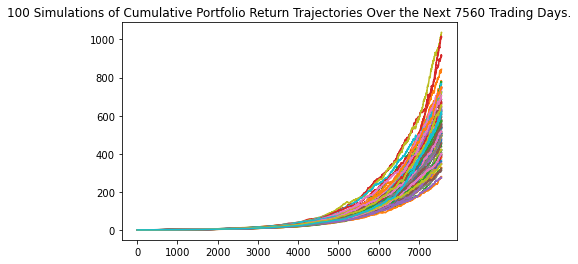

In [33]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
mc_thirty_year.plot_simulation()


#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 100 Simulations'}, ylabel='Frequency'>

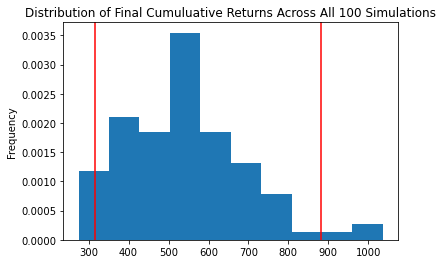

In [34]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
mc_thirty_year.plot_distribution()


#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [35]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
summary = mc_thirty_year.summarize_cumulative_return()


# Review the 30-year Monte Carlo summary statistics
summary

count            100.000000
mean             543.904545
std              147.995514
min              274.662192
25%              433.651364
50%              536.307445
75%              625.873203
max             1036.484241
95% CI Lower     316.644447
95% CI Upper     880.924846
Name: 7560, dtype: float64

### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [36]:
# Print the current balance of the stock and bond portion of the members portfolio
total_stocks_bonds


1190739946.0

In [37]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = round(summary[8] * total_crypto_wallet, 2)
ci_upper_thirty_cumulative_return = round(summary[9] * total_crypto_wallet, 2)

# Print the result of your calculations
print(f'''With the current given value of the stocks/bonds holdings, the cumulative return over the next 30 years is predicted to be between ${ci_lower_thirty_cumulative_return} and 
${ci_upper_thirty_cumulative_return}''')


With the current given value of the stocks/bonds holdings, the cumulative return over the next 30 years is predicted to be between $20045481.94 and 
$55767796.61


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [38]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
mc_ten_year = MCSimulation(
    prices_df,
    weights= [20 , 80],
    num_simulation= 100,
    num_trading_days= 252 * 30
)

# Review the simulation input data
mc_ten_year.portfolio_data


SPY                                       \
                             open     high       low   close    volume   
timestamp                                                                
2019-01-24 05:00:00+00:00  263.21  264.200  262.0800  263.55  59210139   
2019-01-25 05:00:00+00:00  265.62  266.700  263.6595  265.78  97543258   
2019-01-28 05:00:00+00:00  263.38  263.830  261.7900  263.76  85973985   
2019-01-29 05:00:00+00:00  263.93  264.550  262.4800  263.41  66960738   
2019-01-30 05:00:00+00:00  265.09  268.520  264.2500  267.58  92630929   
...                           ...      ...       ...     ...       ...   
2019-04-17 04:00:00+00:00  291.41  291.425  288.9900  289.45  58268470   
2019-04-18 04:00:00+00:00  290.12  290.320  288.6600  290.02  69414428   
2019-04-22 04:00:00+00:00  289.17  290.435  289.0700  290.27  40520264   
2019-04-23 04:00:00+00:00  290.68  293.140  290.4200  292.88  52411775   
2019-04-24 04:00:00+00:00  292.76  293.160  292.0700  292.23  50469550   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-01-24 05:00:00+00:00      315573  263.254660          NaN  106.71   
2019-01-25 05:00:00+00:00      409476  265.863241     0.008461  106.64   
2019-01-28 05:00:00+00:00      408381  263.363031    -0.007600  106.62   
2019-01-29 05:00:00+00:00      287015  263.501239    -0.001327  106.73   
2019-01-30 05:00:00+00:00      469964  266.578426     0.015831  106.87   
...                               ...         ...          ...     ...   
2019-04-17 04:00:00+00:00      245037  289.770682    -0.002447  108.09   
2019-04-18 04:00:00+00:00      231296  289.794161     0.001969  108.23   
2019-04-22 04:00:00+00:00      170767  290.002934     0.000862  108.13   
2019-04-23 04:00:00+00:00      232023  292.102165     0.008992  108.18   
2019-04-24 04:00:00+00:00      203858  292.580824    -0.002219  108.42   

                                                                           \
                               high      low   close   volume trade_count   
timestamp                                                                   
2019-01-24 05:00:00+00:00  106.8400  106.670  106.73  7311478       14637   
2019-01-25 05:00:00+00:00  106.7000  106.560  106.68  3469453       15543   
2019-01-28 05:00:00+00:00  106.7450  106.580  106.62  7365812       17765   
2019-01-29 05:00:00+00:00  106.9250  106.685  106.90  6158842       17524   
2019-01-30 05:00:00+00:00  107.1500  106.790  107.14  6350546       18798   
...                             ...      ...     ...      ...         ...   
2019-04-17 04:00:00+00:00  108.1899  108.050  108.05  3390171        9569   
2019-04-18 04:00:00+00:00  108.2900  108.160  108.19  2217221        8388   
2019-04-22 04:00:00+00:00  108.1600  108.050  108.06  5725616        9161   
2019-04-23 04:00:00+00:00  108.2800  108.150  108.25  3422712       10779   
2019-04-24 04:00:00+00:00  108.5300  108.420  108.50  3000163       10192   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-01-24 05:00:00+00:00  106.742650          NaN  
2019-01-25 05:00:00+00:00  106.638484    -0.000468  
2019-01-28 05:00:00+00:00  106.636129    -0.000562  
2019-01-29 05:00:00+00:00  106.833638     0.002626  
2019-01-30 05:00:00+00:00  107.010126     0.002245  
...                               ...          ...  
2019-04-17 04:00:00+00:00  108.090758    -0.000093  
2019-04-18 04:00:00+00:00  108.211849     0.001296  
2019-04-22 04:00:00+00:00  108.098893    -0.001202  
2019-04-23 04:00:00+00:00  108.236718     0.001758  
2019-04-24 04:00:00+00:00  108.496809     0.002309  

[63 rows x 16 columns]

In [39]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
mc_ten_year.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
1,1.235037e+00,1.542419e+00,1.096768e+00,9.996753e-01,1.241763e+00,8.611219e-01,1.113799e+00,1.150192e+00,1.110718e+00,1.138433e+00,...,6.198206e-01,8.383770e-01,9.487056e-01,1.055957e+00,9.446934e-01,1.240289e+00,1.224360e+00,1.112683e+00,1.071589e+00,1.414664e+00
2,1.310781e+00,1.801550e+00,1.310468e+00,1.143465e+00,1.162576e+00,9.921759e-01,1.085245e+00,1.484871e+00,1.250179e+00,1.193488e+00,...,6.771207e-01,1.356901e+00,1.230023e+00,1.313497e+00,1.009493e+00,9.419193e-01,1.298400e+00,1.202299e+00,1.354927e+00,1.463344e+00
3,1.377363e+00,1.912142e+00,1.366445e+00,1.097457e+00,1.493179e+00,8.167926e-01,1.066088e+00,1.756289e+00,1.661772e+00,1.432593e+00,...,6.170428e-01,1.072438e+00,1.338548e+00,1.159710e+00,8.970683e-01,1.066177e+00,1.122838e+00,1.311523e+00,1.289313e+00,1.226504e+00
4,1.566670e+00,2.649316e+00,1.937547e+00,1.129802e+00,1.993527e+00,5.840833e-01,7.317903e-01,1.721087e+00,2.060623e+00,1.858702e+00,...,7.202997e-01,8.351668e-01,1.384821e+00,1.279571e+00,1.121504e+00,1.607468e+00,1.275492e+00,1.258005e+00,1.026240e+00,1.348570e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,2.401998e+120,1.526967e+117,7.686048e+101,2.304366e+115,1.418783e+116,4.659738e+107,5.533586e+111,1.321478e+112,1.533556e+128,1.285727e+112,...,1.141028e+113,9.748784e+94,3.187214e+122,4.157649e+125,6.028621e+124,4.187578e+102,1.731726e+102,7.118377e+101,2.354366e+116,5.956591e+106
7557,2.122021e+120,1.625588e+117,6.942631e+101,2.052411e+115,1.329187e+116,7.142444e+107,4.827036e+111,1.341825e+112,1.837596e+128,1.337681e+112,...,1.263316e+113,8.367010e+94,4.094632e+122,5.003552e+125,5.728033e+124,4.482216e+102,2.193737e+102,6.102093e+101,1.926809e+116,4.789015e+106
7558,2.468255e+120,1.154036e+117,6.988687e+101,2.072750e+115,1.546207e+116,7.959156e+107,4.253117e+111,1.261120e+112,2.073523e+128,1.425272e+112,...,1.250677e+113,9.365503e+94,3.274595e+122,3.954028e+125,6.010233e+124,4.979442e+102,2.789083e+102,5.093805e+101,2.651652e+116,4.585453e+106
7559,2.701847e+120,1.559144e+117,3.800762e+101,2.545042e+115,1.369719e+116,8.884224e+107,4.557472e+111,1.132384e+112,1.914666e+128,1.870944e+112,...,1.510189e+113,7.855352e+94,3.274870e+122,4.567660e+125,5.722901e+124,5.277671e+102,3.266838e+102,2.485907e+101,3.921521e+116,4.845084e+106


<AxesSubplot:title={'center':'100 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

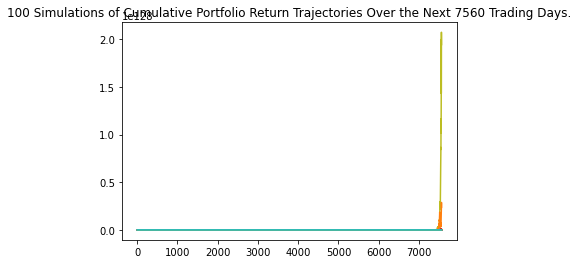

In [40]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
mc_ten_year.plot_simulation()


<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 100 Simulations'}, ylabel='Frequency'>

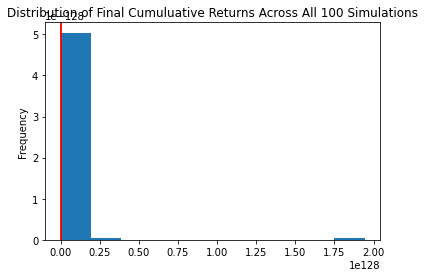

In [41]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
mc_ten_year.plot_distribution()



In [42]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
summary = mc_ten_year.summarize_cumulative_return()



# Review the 10-year Monte Carlo summary statistics
summary

count            1.000000e+02
mean            2.198413e+126
std             1.956333e+127
min            -2.168454e+103
25%             5.672177e+105
50%             3.809807e+111
75%             1.764895e+116
max             1.944471e+128
95% CI Lower     1.848275e+97
95% CI Upper    5.735940e+125
Name: 7560, dtype: float64

### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [43]:
# Print the current balance of the stock and bond portion of the members portfolio
total_stocks_bonds


1190739946.0

In [44]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = round(summary[8] * total_crypto_wallet, 2)
ci_upper_ten_cumulative_return = round(summary[9] * total_crypto_wallet, 2)


# Print the result of your calculations
print(f'''With the current given value of the stocks/bonds holdings, the cumulative return over the next 10 years is predicted to be between ${ci_lower_ten_cumulative_return} and 
${ci_upper_ten_cumulative_return}''')



With the current given value of the stocks/bonds holdings, the cumulative return over the next 10 years is predicted to be between $1.1700685378995783e+102 and 
$3.6311924069435144e+130


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?